In [534]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [535]:
df = pd.read_csv('poi_kelurahan.csv')
df.head()

,kota,id,tipe,nama,amenity,latitude,longitude
0,Kelurahan Sukabakti,11751799554,node,Pertamina,fuel,-6.258017,106.576410
1,Kelurahan Sukabakti,487246887,way,Ruko Pasar Curug,marketplace,-6.261999,106.559321
2,Kelurahan Sukabakti,487246888,way,Ruko Pasar Curug,marketplace,-6.261818,106.559145
3,Kelurahan Sukabakti,487246889,way,Ruko Pasar Curug,marketplace,-6.261718,106.559061
4,Kelurahan Sukabakti,487246890,way,Ruko Pasar Curug,marketplace,-6.261515,106.559231


In [536]:
import numpy as np

np.random.seed(42)
df["jml_penduduk"] = np.random.randint(50, 500, size=len(df))
df["jml_nasabah"] = np.random.randint(10, 200, size=len(df))
df["jml_nasabah_mikro"] = (
    df["jml_nasabah"] * np.random.uniform(0.1, 0.7, len(df))
).astype(int)

df = df.fillna("Tidak Ada")  

# df.to_csv("pgd_sukabakti.csv", index=False)
# print("\nFile disimpan ke: pgd_sukabakti.csv")

df.to_csv("pgd_full.csv", index=False)
print("\nFile disimpan ke: pgd_full.csv")


File disimpan ke: pgd_full.csv


In [537]:
# def filter_kelurahan(df, nama_kelurahan):
#     return df[df['kota'].str.contains(nama_kelurahan, case=False, na=False)].reset_index(drop=True)

# nama_kel = "Kota Yogyakarta"
# df = filter_kelurahan(df, nama_kel)


In [538]:
np.random.seed(42)
df["jml_penduduk"] = np.random.randint(50, 500, size=len(df))
df["jml_nasabah"] = np.random.randint(10, 200, size=len(df))
df["jml_nasabah_mikro"] = (df["jml_nasabah"] * np.random.uniform(0.1, 0.7, len(df))).astype(int)

df.to_csv("pgd_full.csv", index=False)
print("\n File disimpan ke: pgd_full.csv")


 File disimpan ke: pgd_full.csv


In [539]:
coords = list(zip(df['latitude'], df['longitude']))
VILL = len(coords)
print(f"Jumlah POI: {VILL}")

Jumlah POI: 21


In [540]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius kilometer bumi (km)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    return 2*R*np.arcsin(np.sqrt(a))

In [541]:
distances = np.zeros((VILL, VILL))
for i in range(VILL):
    for j in range(VILL):
        if i != j:
            distances[i,j] = haversine(*coords[i],*coords[j])

In [542]:
m = 20  # jumlah semut
alpha = 1  # pengaruh pheromone
beta = 5  # pengaruh jarak (heuristik)
rho = 0.5  # evaporation rate pheromone
Q = 100  # total pheromone yang ditinggalkan semut
iterations = 100 
tau0 = 1.0  # pheromone awal
pheromone = np.ones((VILL, VILL)) * tau0  # inisialisasi pheromone

best_route, best_length = None, float('inf')

In [543]:
def route_length(route):
    return sum(distances[route[i], route[(i + 1)%VILL]] for i in range(VILL))

def choose_next(current, visited):
    probs = []
    for j in range(VILL):
        if j not in visited:
            tau = pheromone[current][j] ** alpha
            eta = (1 / distances[current,j]) ** beta
            probs.append(tau * eta)
        else:
            probs.append(0)
    probs = np.array(probs)
    probs /= probs.sum()
    return np.random.choice(range(VILL), p=probs)

ACO

In [544]:
target_lat, target_lon = -6.2537945,106.5639764
start_idx = np.argmin([
    np.hypot(lat - target_lat, lon - target_lon)
    for lat, lon in coords
])
for it in range(iterations):
    all_routes = []
    all_lengths = []
    for k in range(m):
        start = start_idx
        route = [start]
        while len(route) < VILL:
            route.append(choose_next(route[-1], route))
        Lk = route_length(route)
        all_routes.append(route)
        all_lengths.append(Lk)
        if Lk < best_length:
            best_length = Lk
            best_route = route
    
    #update pheromone
    pheromone *= (1 - rho)
    for route, Lk in zip(all_routes, all_lengths):
        for i in range(VILL):
            a, b = route[i], route[(i + 1) % VILL]
            pheromone[a][b] += Q / Lk
            pheromone[a][b] += Q / Lk
            
    print(f"Iterasi {it+1}/{iterations}, Rute Terbaik: {best_route}, Panjang: {best_length:.2f}")

Iterasi 1/100, Rute Terbaik: [np.int64(5), np.int64(9), np.int64(8), np.int64(15), np.int64(14), np.int64(10), np.int64(18), np.int64(17), np.int64(16), np.int64(19), np.int64(20), np.int64(3), np.int64(2), np.int64(4), np.int64(1), np.int64(6), np.int64(11), np.int64(12), np.int64(13), np.int64(0), np.int64(7)], Panjang: 9.22
Iterasi 2/100, Rute Terbaik: [np.int64(5), np.int64(9), np.int64(8), np.int64(15), np.int64(14), np.int64(10), np.int64(18), np.int64(17), np.int64(16), np.int64(19), np.int64(20), np.int64(3), np.int64(2), np.int64(4), np.int64(1), np.int64(6), np.int64(11), np.int64(12), np.int64(13), np.int64(0), np.int64(7)], Panjang: 9.22
Iterasi 3/100, Rute Terbaik: [np.int64(5), np.int64(9), np.int64(8), np.int64(15), np.int64(14), np.int64(10), np.int64(18), np.int64(17), np.int64(16), np.int64(19), np.int64(20), np.int64(3), np.int64(2), np.int64(4), np.int64(1), np.int64(6), np.int64(11), np.int64(12), np.int64(13), np.int64(0), np.int64(7)], Panjang: 9.22
Iterasi 4/100

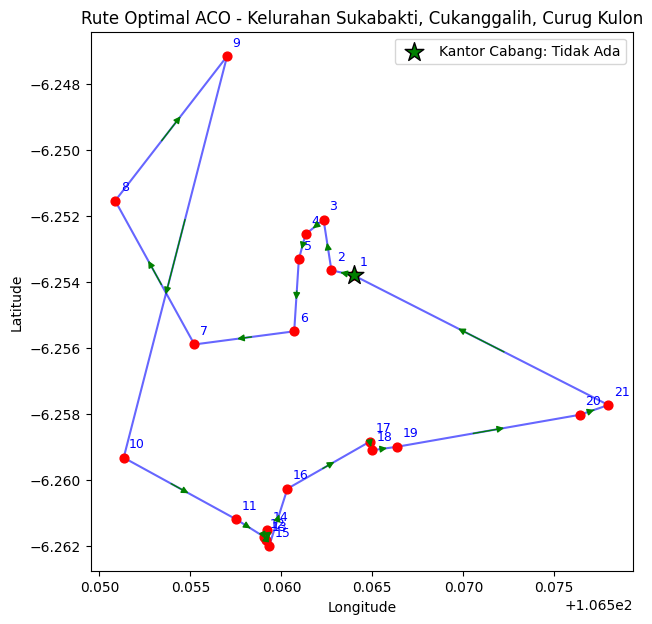

In [545]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(7,7))

for i,(lat,lon) in enumerate(coords):
    plt.scatter(lon, lat, c='red', s=40, zorder=3)

for step, idx in enumerate(best_route):
    lat, lon = coords[idx]
    plt.text(lon+0.0003, lat+0.0003, str(step+1), fontsize=9, color='blue')

plt.scatter(coords[start_idx][1], coords[start_idx][0],
            c='green', marker='*', s=200, edgecolors='black',
            label=f"Kantor Cabang: {df.iloc[start_idx]['nama']}", zorder=4)

for i in range(VILL):
    a, b = best_route[i], best_route[(i+1)%VILL]
    x1, y1 = coords[a][1], coords[a][0]
    x2, y2 = coords[b][1], coords[b][0]

    plt.plot([x1, x2], [y1, y2], 'b-', alpha=0.6, zorder=2)

    mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
    dx, dy = x2 - x1, y2 - y1
    arrow = FancyArrowPatch(
        (mid_x - dx*0.1, mid_y - dy*0.1),
        (mid_x + dx*0.1, mid_y + dy*0.1),
        arrowstyle='-|>', color='green',
        mutation_scale=10, lw=1, zorder=5)
    plt.gca().add_patch(arrow)

plt.title("Rute Optimal ACO - Kelurahan Sukabakti, Cukanggalih, Curug Kulon")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.legend()
plt.show()


In [556]:
import folium, osmnx as ox, numpy as np, pandas as pd
import datetime
from folium.plugins import MarkerCluster

speed_kmh   = 30    # kecepatan rata-rata kendaraan
visit_min   = 30    # lama kunjungan per titik (menit)
work_start  = datetime.time(7,45)
lunch_start_time = datetime.time(12,0)
lunch_end_time   = datetime.time(13,0)
work_end_time    = datetime.time(16,45)

center_lat, center_lon = np.mean([c[0] for c in coords]), np.mean([c[1] for c in coords])
G = ox.graph_from_point((center_lat, center_lon), dist=3000, network_type='drive')

node_ids_all = []
snap_coords_all = []
for lat, lon in coords:
    node = ox.distance.nearest_nodes(G, lon, lat)
    node_ids_all.append(node)
    snap_coords_all.append((G.nodes[node]['y'], G.nodes[node]['x']))

# best_route diasumsikan berisi semua indeks (0..VILL-1) dalam suatu urutan TSP
best_route_round = best_route + [best_route[0]]
node_ids_round   = [node_ids_all[i] for i in best_route_round]
snap_coords_round= [snap_coords_all[i] for i in best_route_round]

schedule = []
total_distance = 0.0
day = 1
current_time = datetime.datetime(2025,1,1,work_start.hour,work_start.minute)

def next_workday(curr):
    return (curr + datetime.timedelta(days=1)).replace(hour=work_start.hour, minute=work_start.minute)

def today_time(curr):
    return curr.time()

for i in range(len(best_route_round)-1):
    a = best_route_round[i]
    b = best_route_round[i+1]

    path = ox.shortest_path(G, node_ids_all[a], node_ids_all[b], weight='length')
    dist_m = sum(G[u][v][0]['length'] for u, v in zip(path[:-1], path[1:]))
    dist_km = dist_m / 1000
    total_distance += dist_km
    travel_min = (dist_km / speed_kmh) * 60

    def insert_lunch():
        schedule.append({
            "hari": day,
            "nama": "ISTIRAHAT",
            "tiba": lunch_start_time.strftime("%H:%M"),
            "selesai": lunch_end_time.strftime("%H:%M"),
            "jarak": "-",
            "potensi": "-"
        })

    if (today_time(current_time) < lunch_start_time and
        today_time(current_time + datetime.timedelta(minutes=travel_min)) >= lunch_start_time):
        insert_lunch()
        current_time = current_time.replace(hour=lunch_end_time.hour,
                                            minute=lunch_end_time.minute)

    if today_time(current_time + datetime.timedelta(minutes=travel_min + visit_min)) > work_end_time:
        day += 1
        current_time = next_workday(current_time)

    current_time += datetime.timedelta(minutes=travel_min)
    arrive = current_time.strftime("%Y-%m-%d %H:%M")
    current_time += datetime.timedelta(minutes=visit_min)
    leave = current_time.strftime("%Y-%m-%d %H:%M")

    row = df.iloc[b]
    potensi = max(0, row['jml_penduduk'] - (row['jml_nasabah'] + row['jml_nasabah_mikro']))

    schedule.append({
        "hari": day,
        "idx": b,  
        "nama": row['nama'],
        "tiba": arrive,
        "selesai": leave,
        "jarak": f"{dist_km:.2f} km",
        "potensi": potensi
    })

m = folium.Map(location=[center_lat, center_lon], zoom_start=15, control_scale=True)
cluster = MarkerCluster().add_to(m)

for i in range(len(node_ids_round)-1):
    a, b = node_ids_round[i], node_ids_round[i+1]
    path = ox.shortest_path(G, a, b, weight='length')
    path_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in path]
    folium.PolyLine(path_coords, color="blue", weight=4, opacity=0.8).add_to(m)

start_latlon = coords[best_route[0]]

folium.Marker(
    location=start_latlon,
    popup="Kantor Cabang (Start/End)",
    icon=folium.Icon(color="green", icon="play"),
    z_index_offset=1000
).add_to(m)

for step, idx in enumerate(best_route_round[:-1]):
    lat, lon = snap_coords_all[idx]  
    row = df.iloc[idx]
    potensi = max(0, row['jml_penduduk'] - (row['jml_nasabah'] + row['jml_nasabah_mikro']))

    sched = next((s for s in schedule if s.get('idx') == idx), None)

    popup_html = f"""
    <b>{step+1}. {row['nama']}</b><br>
    Amenity           : {row.get('amenity','-')}<br>
    Latitude          : {lat:.6f}<br>
    Longitude         : {lon:.6f}<br>
    Jml Penduduk      : {row.get('jml_penduduk','-'):,}<br>
    Jml Nasabah       : {row.get('jml_nasabah','-'):,}<br>
    Jml Nasabah Mikro : {row.get('jml_nasabah_mikro','-'):,}<br>
    <b>Potensi Nasabah:</b> {potensi:,}<br>
    <hr style="margin:4px">
    Hari   : {sched['hari'] if sched else '-'}<br>
    Tiba   : {sched['tiba'] if sched else '-'}<br>
    Selesai: {sched['selesai'] if sched else '-'}<br>
    Jarak dr titik sebelumnya: {sched['jarak'] if sched else '-'}
    """

    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_html, max_width=360),
        tooltip=f"{step+1}. {row['nama']}",
        icon=folium.DivIcon(html=f"""
            <div style="font-size:12pt;
                        color:white;
                        background:red;
                        text-align:center;
                        border-radius:50%;
                        width:28px;height:28px;
                        line-height:28px;">{step+1}</div>
        """),
        z_index_offset=1000
    ).add_to(cluster) 


pd.set_option('display.max_rows', None)
print(pd.DataFrame(schedule))
m


    hari   idx                         nama              tiba  \
0      1   9.0           SMP Negeri 1 Curug  2025-01-01 07:45   
1      1   8.0             RS Keluarga Kita  2025-01-01 08:15   
2      1  15.0                          KFC  2025-01-01 08:45   
3      1  14.0                    Pertamina  2025-01-01 09:17   
4      1  10.0    SMK Yuppentek 2 Tangerang  2025-01-01 09:49   
5      1  18.0                    Tidak Ada  2025-01-01 10:21   
6      1  17.0                       mesjid  2025-01-01 10:53   
7      1  16.0  Paramount Petals Club House  2025-01-01 11:28   
8      1   NaN                    ISTIRAHAT             12:00   
9      1  19.0                    Tidak Ada  2025-01-01 13:05   
10     1  20.0                    Tidak Ada  2025-01-01 13:37   
11     1   3.0             Ruko Pasar Curug  2025-01-01 14:07   
12     1   2.0             Ruko Pasar Curug  2025-01-01 14:38   
13     1   4.0             Ruko Pasar Curug  2025-01-01 15:09   
14     1   1.0           